In [1]:
import pandas as pd
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
import math
tqdm.pandas()

In [2]:
df = pd.read_csv('../dataset/2020-02-road-2-in.csv',parse_dates=["datetime"])
# df = df.drop(['all_units','samecell_units','max_speed','avg_traveltime','max_traveltime'],axis=1)
df

,datetime,km,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,road_number,road_direction
0,2020-02-01 00:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.038462,0.000000,2,in
1,2020-02-01 00:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.038462,0.000000,2,in
2,2020-02-01 01:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.038462,0.000000,2,in
3,2020-02-01 01:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.038462,0.000000,2,in
4,2020-02-01 02:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.038462,0.000000,2,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685253,2020-02-29 19:30:00,508.0,0.111111,0.000000,1.111111,0.111111,5.222222,5.222222,0.0,0.0,0.000000,0.042735,0.049735,2,in
685254,2020-02-29 20:00:00,508.0,0.666667,0.222222,0.333333,0.444444,29.333333,29.333333,0.0,0.0,0.008889,0.012821,0.279365,2,in
685255,2020-02-29 20:30:00,508.0,0.250000,0.000000,1.000000,0.250000,19.000000,19.000000,0.0,0.0,0.000000,0.038462,0.180952,2,in
685256,2020-02-29 21:00:00,508.0,0.250000,0.250000,0.750000,0.000000,8.750000,8.750000,0.0,0.0,0.010000,0.028846,0.083333,2,in


In [3]:
df['inflow_units_N'] = (df["inflow_units"] - df["inflow_units"].min()) / (df["inflow_units"].max() - df["inflow_units"].min())
df['outflow_units_N'] = (df["outflow_unit"] - df["outflow_unit"].min()) / (df["outflow_unit"].max() - df["outflow_unit"].min())
df['avg_speed_N'] = (df["avg_speed"] - df["avg_speed"].min()) / (df["avg_speed"].max() - df["avg_speed"].min())
df

,datetime,km,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,road_number,road_direction
0,2020-02-01 00:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in
1,2020-02-01 00:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in
2,2020-02-01 01:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in
3,2020-02-01 01:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in
4,2020-02-01 02:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685253,2020-02-29 19:30:00,508.0,0.111111,0.000000,1.111111,0.111111,5.222222,5.222222,0.0,0.0,0.000000,0.102249,0.050701,2,in
685254,2020-02-29 20:00:00,508.0,0.666667,0.222222,0.333333,0.444444,29.333333,29.333333,0.0,0.0,0.019782,0.030675,0.284790,2,in
685255,2020-02-29 20:30:00,508.0,0.250000,0.000000,1.000000,0.250000,19.000000,19.000000,0.0,0.0,0.000000,0.092025,0.184466,2,in
685256,2020-02-29 21:00:00,508.0,0.250000,0.250000,0.750000,0.000000,8.750000,8.750000,0.0,0.0,0.022255,0.069018,0.084951,2,in


In [ ]:
# sns.pairplot(df,vars=['inflow_units_N','outflow_units_N','avg_speed_N'],hue="cluster")

In [ ]:
# fig = px.scatter_matrix(df.drop(["datetime","road_number","km","direction","inflow_units","outflow_unit","avg_speed"],axis=1),width=600, height=1000)
# fig.show()

In [4]:
df.max(axis=0)

datetime           2020-02-29 23:30:00
km                               508.0
all_units                         33.2
inflow_units                 11.233333
outflow_unit                 10.866667
samecell_units               30.266667
avg_speed                        103.0
max_speed                        107.0
avg_traveltime                   896.0
max_traveltime                   896.0
inflow_units_N                     1.0
outflow_units_N                    1.0
avg_speed_N                        1.0
road_number                          2
road_direction                      in
dtype: object

In [5]:
X = df[['inflow_units_N','outflow_units_N','avg_speed_N']].values
X

array([[0.        , 0.09202454, 0.        ],
       [0.        , 0.09202454, 0.        ],
       [0.        , 0.09202454, 0.        ],
       ...,
       [0.        , 0.09202454, 0.18446602],
       [0.02225519, 0.0690184 , 0.08495146],
       [0.04451039, 0.04601227, 0.32038835]])

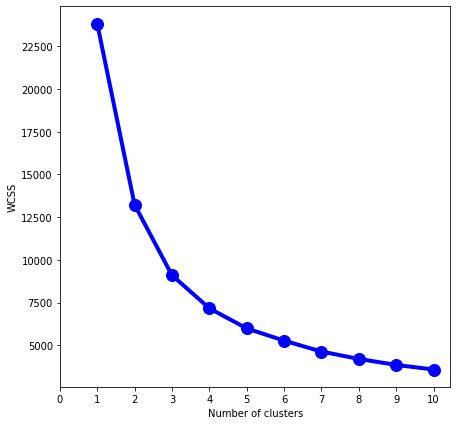

In [6]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'blue')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
model = KMeans(n_clusters = 5,init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X)
df['cluster'] = y_clusters
y_clusters

array([3, 3, 3, ..., 3, 3, 0])

C:\Users\Tananett\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

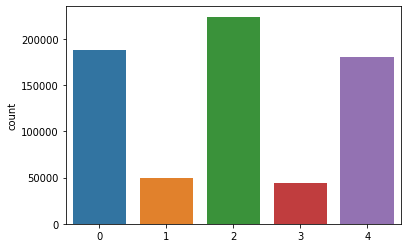

In [8]:
sns.countplot(y_clusters)

In [9]:
X

array([[0.        , 0.09202454, 0.        ],
       [0.        , 0.09202454, 0.        ],
       [0.        , 0.09202454, 0.        ],
       ...,
       [0.        , 0.09202454, 0.18446602],
       [0.02225519, 0.0690184 , 0.08495146],
       [0.04451039, 0.04601227, 0.32038835]])

In [10]:
print(X[y_clusters == 0,0][0])
print(X[y_clusters == 0,1][0])
print(X[y_clusters == 0,2][0])

0.12199142762940984
0.10906612133605997
0.3610212153901474


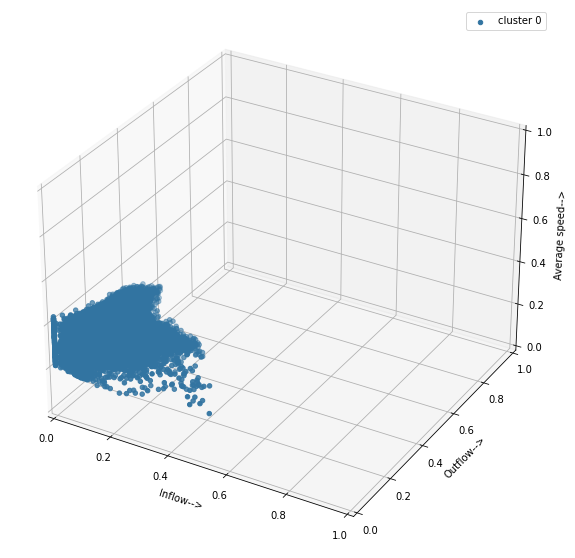

In [11]:
fig1 = plt.figure(figsize = (10,10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 20 , color = '#3274A1', label = "cluster 0")
ax1.set_xlim3d(0,1)
ax1.set_ylim3d(0,1)
ax1.set_zlim3d(0,1)
ax1.set_xlabel('Inflow-->')
ax1.set_ylabel('Outflow-->')
ax1.set_zlabel('Average speed-->')
ax1.legend()
plt.show()

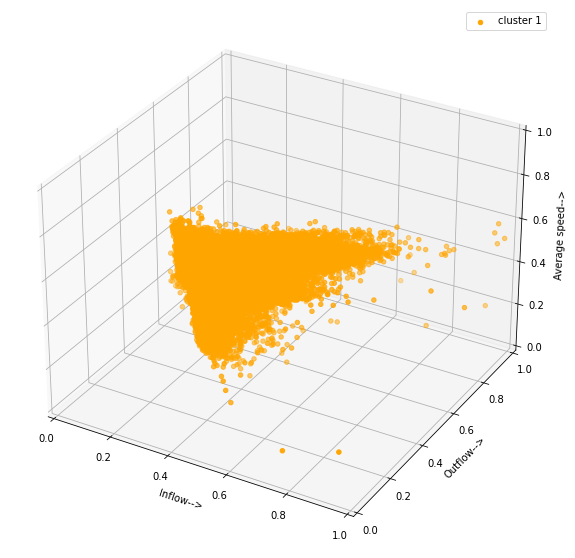

In [12]:
fig2 = plt.figure(figsize = (10,10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 20 , color = 'orange', label = "cluster 1")
ax2.set_xlim3d(0,1)
ax2.set_ylim3d(0,1)
ax2.set_zlim3d(0,1)
ax2.set_xlabel('Inflow-->')
ax2.set_ylabel('Outflow-->')
ax2.set_zlabel('Average speed-->')
ax2.legend()
plt.show()

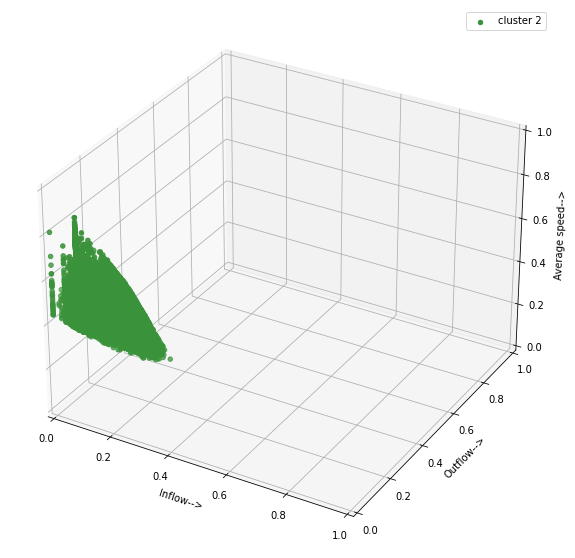

In [13]:
fig3 = plt.figure(figsize = (10,10))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 20 , color = '#3A923A', label = "cluster 2")
ax3.set_xlim3d(0,1)
ax3.set_ylim3d(0,1)
ax3.set_zlim3d(0,1)
ax3.set_xlabel('Inflow-->')
ax3.set_ylabel('Outflow-->')
ax3.set_zlabel('Average speed-->')
ax3.legend()
plt.show()

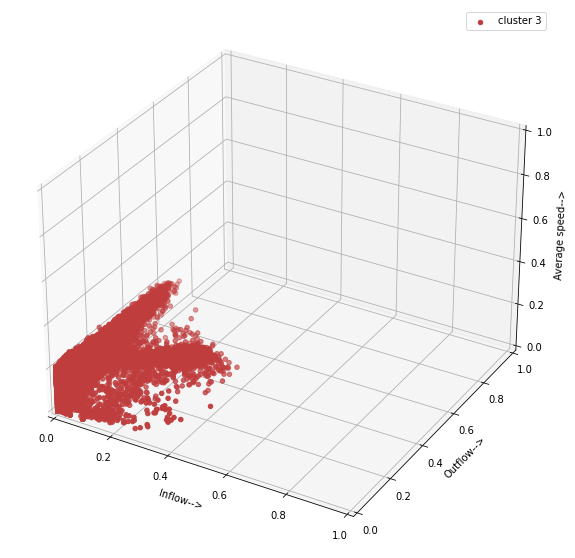

In [14]:
fig4 = plt.figure(figsize = (10,10))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 20 , color = '#C03D3E', label = "cluster 3")
ax4.set_xlim3d(0,1)
ax4.set_ylim3d(0,1)
ax4.set_zlim3d(0,1)
ax4.set_xlabel('Inflow-->')
ax4.set_ylabel('Outflow-->')
ax4.set_zlabel('Average speed-->')
ax4.legend()
plt.show()

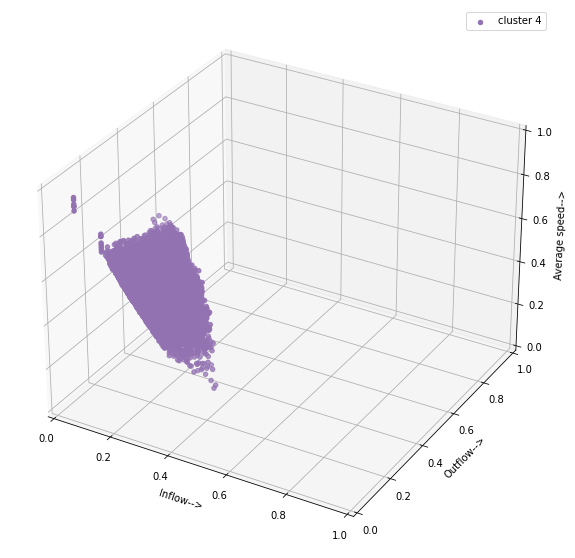

In [15]:
fig5 = plt.figure(figsize = (10,10))
ax5 = fig5.add_subplot(111, projection='3d')
ax5.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 20 , color = '#9372B2', label = "cluster 4")
ax5.set_xlim3d(0,1)
ax5.set_ylim3d(0,1)
ax5.set_zlim3d(0,1)
ax5.set_xlabel('Inflow-->')
ax5.set_ylabel('Outflow-->')
ax5.set_zlabel('Average speed-->')
ax5.legend()
plt.show()

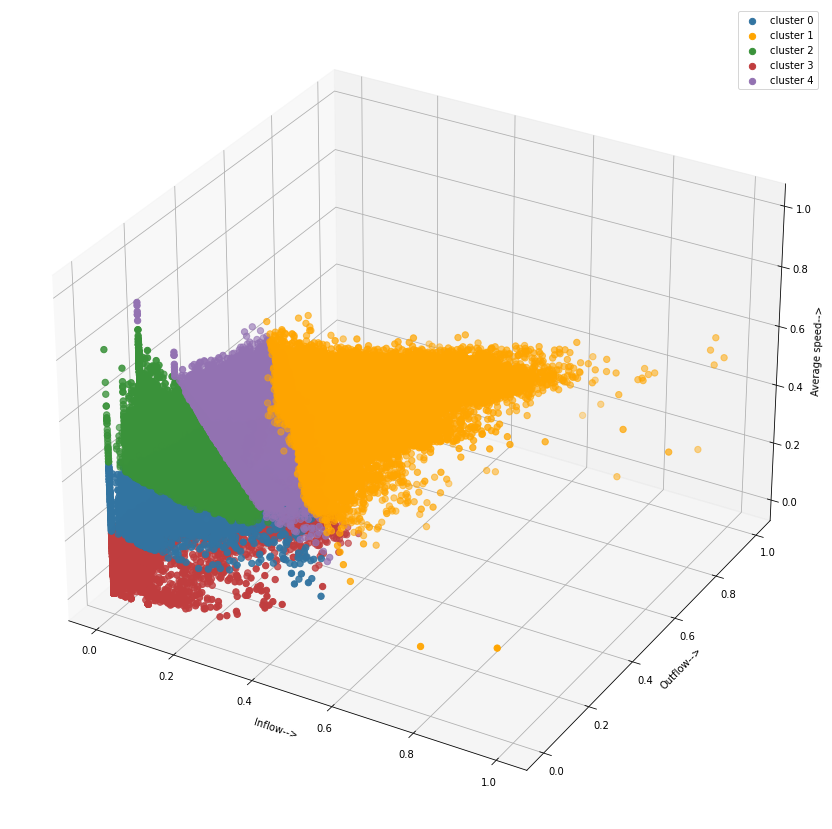

In [16]:
fig6 = plt.figure(figsize = (15,15))
ax6 = fig6.add_subplot(111, projection='3d')
ax6.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = '#3274A1', label = "cluster 0")
ax6.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax6.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = '#3A923A', label = "cluster 2")
ax6.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = '#C03D3E', label = "cluster 3")
ax6.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 40 , color = '#9372B2', label = "cluster 4")
# ax.scatter(X[y_clusters == 5,0],X[y_clusters == 5,1],X[y_clusters == 5,2], s = 40 , color = 'cyan', label = "cluster 5")
# ax.scatter(X[y_clusters == 6,0],X[y_clusters == 6,1],X[y_clusters == 6,2], s = 40 , color = 'yellow', label = "cluster 6")
ax6.set_xlabel('Inflow-->')
ax6.set_ylabel('Outflow-->')
ax6.set_zlabel('Average speed-->')
ax6.legend()
plt.show()

In [17]:
# df.to_csv("../dataset/cluster/2020-02-road2-in-5clusterp.csv",index=False)